<a href="https://colab.research.google.com/github/Whitchurch/Tensorflow/blob/main/Exercise_4_Multi_class_classifier_Question_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis = 3)
testing_images = np.expand_dims(testing_images,axis = 3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
                        rescale=1/255,
                        rotation_range=40,
                        width_shift_range=.2,
                        height_shift_range=.2,
                        shear_range=.2,
                        zoom_range=.2,
                        horizontal_flip=True,
                        fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255)
    # Your Code Here)
    
train_generator = train_datagen.flow(
    training_images,
    training_labels,
    class_mode='categorical',
    batch_size=20)


validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    class_mode='categorical',
    batch_size=20
)
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the fully connected dense layer part of the Neural Network  
                                      tf.keras.layers.Flatten(), 
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),  
                                      tf.keras.layers.Dense(26, activation='softmax')])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator,validation_data = validation_generator, epochs = 10,steps_per_epoch = 1372, validation_steps = 350,verbose = 1 )

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
1372/1372 [==============================] - 77s 56ms/step - loss: 2.4914 - accuracy: 0.2354 - val_loss: 1.3461 - val_accuracy: 0.5664
Epoch 2/10
1372/1372 [==============================] - 79s 58ms/step - loss: 1.5836 - accuracy: 0.4931 - val_loss: 0.8130 - val_accuracy: 0.7084
Epoch 3/10
1372/1372 [==============================] - 80s 58ms/step - loss: 1.1597 - accuracy: 0.6178 - val_loss: 0.5724 - val_accuracy: 0.7971
Epoch 4/10
1372/1372 [==============================] - 80s 59ms/step - loss: 0.9162 - accuracy: 0.7006 - val_loss: 0.5247 - val_accuracy: 0.8146
Epoch 5/10
1372/1372 [==============================] - 81s 59ms/step - loss: 0.7829 - accuracy: 0.7425 - val_loss: 0.3671 - val_accuracy: 0.8756
Epoch 6/10
1372/1372 [==============================] - 82s 60ms/step - loss: 0.6875 - accuracy: 0.7736 - val_loss: 0.4791 - val_accuracy: 0.8553
Epoch 7/10
1372/1372 [==============================] - 82s 60ms/step - loss: 0.6317 - accuracy: 0.7985 - val_loss: 0.2204 -

[242.96260944798348, 0.6759621]

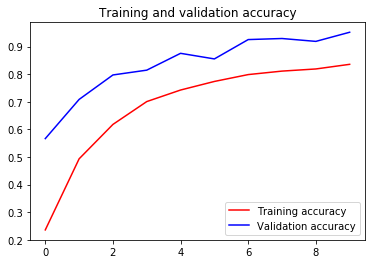

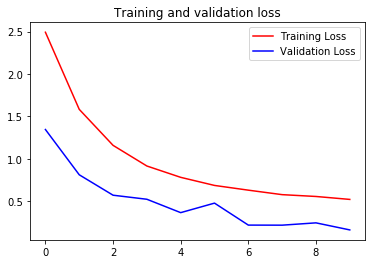

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);